In [85]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [5]:
start = '2013-01-01'
end = '2023-12-31'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [9]:
data.reset_index(inplace = True)

In [11]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,17.969599,102033017
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,17.980036,93075567
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.335327,110954331
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.255327,66476239
4,2013-01-08,18.319834,18.338762,18.043119,18.264042,18.219299,67295297
...,...,...,...,...,...,...,...
2763,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.370361,18494700
2764,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.470123,11170100
2765,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.093506,17288400
2766,2023-12-28,141.850006,142.270004,140.828003,141.279999,140.933899,12192500


In [99]:
#use the moving average of past 100 days for stock price prediction
moving_avg_100_days = data.Close.rolling(100).mean()

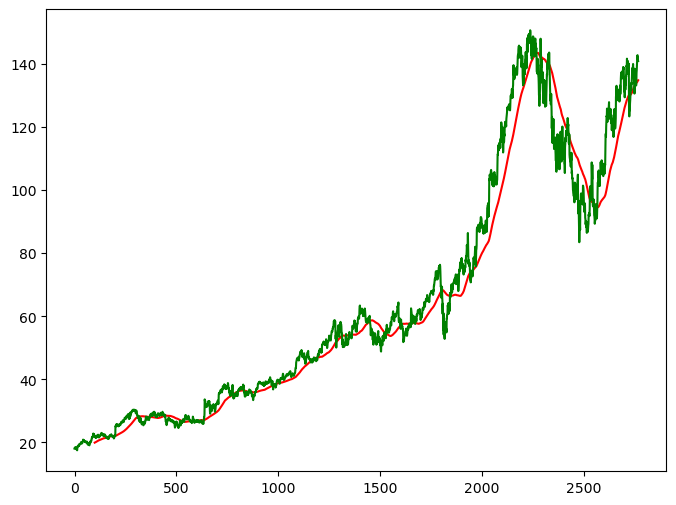

In [15]:
plt.figure(figsize = (8, 6))
plt.plot(moving_avg_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [21]:
moving_avg_200_days = data.Close.rolling(200).mean()

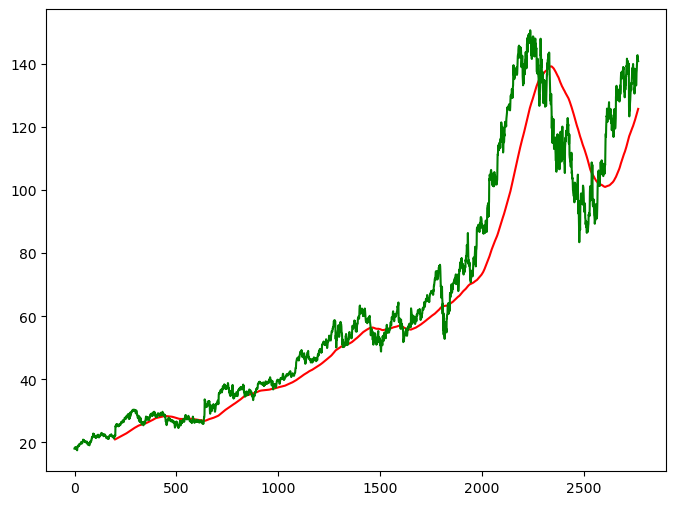

In [23]:
plt.figure(figsize = (8,6))
plt.plot(moving_avg_200_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [25]:
data.dropna(inplace = True)

In [27]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [29]:
data.shape

(2768, 7)

In [71]:
data_train = pd.DataFrame(data.Close[0: int(len(data) * 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80): len(data)])

In [75]:
data_train.shape

(2214, 1)

In [77]:
data_test.shape

(554, 1)

In [79]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [83]:
data_train_scale = scaler.fit_transform(data_train)

In [103]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i - 100: i])
    y.append(data_train_scale[i, 0])

x, y = np.array(x), np.array(y)

In [105]:
#Building model

In [129]:
from keras.layers import Dense, Dropout, LSTM, Input
from keras.models import Sequential

In [151]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = ((x.shape[1], 1))))

model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [153]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [155]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.0468
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0040
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0038
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0050
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0036
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0038
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0030
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0034
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0025
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0030
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0028
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0029
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0026
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0052
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0023
Epoc

In [157]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [159]:
past_100_days = data_train.tail(100)

In [161]:
data_test = pd.concat([past_100_days, data_test], ignore_index = True)

In [163]:
data_test

,Close
0,121.676498
1,120.125504
2,120.578003
3,121.490501
4,121.064003
...,...
649,142.720001
650,142.820007
651,141.440002
652,141.279999


In [165]:
data_test_scale = scaler.fit_transform(data_test)

In [169]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i - 100: i])
    y.append(data_test_scale[i, 0])

x, y = np.array(x), np.array(y)

In [171]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [181]:
scale = 1 / scaler.scale_

In [183]:
y_predict = y_predict * scale

In [185]:
y = y * scale

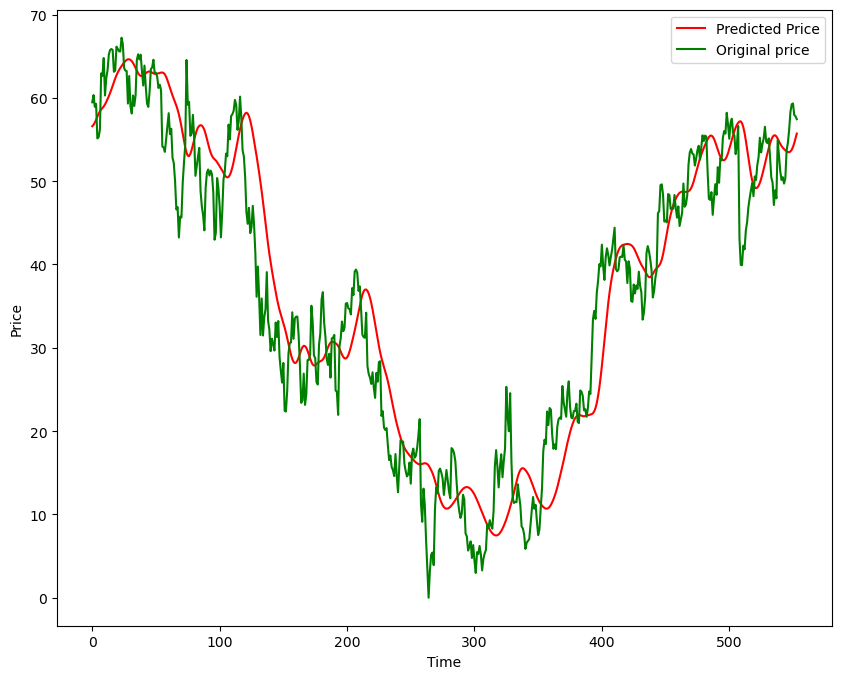

In [189]:
plt.figure(figsize = (10, 8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [191]:
model.save('Stock Predictions Model.keras')